In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
bank_df = pd.read_csv("bank.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = bank_df.shape[0]
num_cols = bank_df.shape[1]

print(f"Tập dữ liệu có {num_rows} dòng")
print(f"Tập dữ liệu có {num_cols} cột")

Tập dữ liệu có 11162 dòng
Tập dữ liệu có 17 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo như mô tả của tác giả cũng như quan sát về tập dữ liệu thì mỗi dòng cho biết thông tin của một khách hàng, lần liên lạc cuối cùng đối với khách hàng đó trong chiến dịch và kết quả người đó có đăng ký tiền gửi có kỳ hạn hay không.
- Không có dòng nào khác với các dòng còn lại.

### Dữ liệu có các dòng bị lặp không?

In [4]:
bank_df.duplicated().sum()

0

Không có các dòng bị lặp trong tập dữ liệu.

### Mỗi cột có ý nghĩa gì?

Mô tả về các cột trong tập dữ liệu `bank.csv` theo `UCI Machine Learning Repository`:
- Thông tin khách hàng:
    - **age**: age (numeric)
    - **job**: type of job (categorical: 'admin.','blue\-collar','entrepreneur','housemaid','management','retired','services','student','technician','unemployed', 'self-employed', 'unknown')
    - **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    - **education**: academic level (categorical: primary, secondary, tertiary and unknown)
    - **default**: has credit in default? (categorical: 'no','yes','unknown')
    - **housing**: has housing loan? (categorical: 'no','yes','unknown')
    - **loan**: has personal loan? (numeric: 'no','yes','unknown')
    - **balance**: balance of the individual.
- Lần liên lạc cuối cùng trong chiến dịch:
    - **contact**: contact communication type (categorical: 'cellular','telephone')
    - **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - **day**: last contact day of this month (numeric)
    - **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- Các thông tin còn lại:
    - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
    - **previous**: number of contacts performed before this campaign and for this client (numeric)
    - **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    - **deposit**: has the client subscribed a term deposit? (binary: 'yes','no')

### Dữ liệu có bị thiếu hay không?

Theo flow của một bài HW của thầy thì phần kiểm tra dữ liệu có bị thiếu hay không thường nằm trước phần ý nghĩa của mỗi cột đúng không ạ? Nhưng trong bài này em xin phép hoán đổi thứ tự hai phần này với lí do bởi vì trong phần mô tả ý nghĩa của các cột thì các cột dữ liệu có dạng `categorical` sẽ có các giá trị `unknown` (giá trị thiếu) do đó muốn kiểm tra liệu rằng dữ liệu có bị thiếu hay không thì phải chuyển giá trị `unknown` thành các giá trị `NaN` trước !!!

In [5]:
bank_df.replace("unknown", np.nan, inplace=True)
bank_df.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

Như thầy đã thấy, nếu như em làm bước này trước thì rõ ràng đã bỏ sót 1 lượng lớn các giá trị bị thiếu rồi đúng không ạ :<. Hiện tại có 4 cột dữ liệu bị thiếu là `job`, `education`, `contact` và `poutcome`, em sẽ chưa xử lý chúng ngay bây giờ...

Trong số các cột bị thiếu dữ liệu trên, cột poutcome thiếu quá nhiều dữ liệu (74.59%) do đó em sẽ loại bỏ cột này ra khỏi dữ liệu

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
col_dtypes = bank_df.dtypes
col_dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Có thể thấy tất cả các cột đều có kiểu dữ liệu phù hợp rồi nên em chuyển tiếp tới khám phá phân bố của dữ liệu.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

- Như đã nói ở trên, tập dữ liệu không có cột nào bị thiếu dữ liệu do đó ở đây, em chỉ xét đến min và max của các cột này.
- Các cột có dạng numeric bao gồm: "age", "balance", "day", "duration", "campaign", "pdays", "previous".

In [7]:
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
numeric_cols = bank_df[num_cols]
miss = numeric_cols.isna().mean() * 100
min_val = numeric_cols.min()
max_val = numeric_cols.max()
nume_col_profiles_df = pd.DataFrame([miss, min_val,max_val], 
                                    columns = num_cols,
                                    index = ["missing_ratio", "min", "max"])
nume_col_profiles_df

,age,balance,day,duration,campaign,pdays,previous
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,18.0,-6847.0,1.0,2.0,1.0,-1.0,0.0
max,95.0,81204.0,31.0,3881.0,63.0,854.0,58.0


- Khoan khoan, hình như là có khá nhiều điểm bất thường trong các giá trị min/max của các cột numeric:
    - Ở cột `age`, người khách hàng lớn tuổi nhất được marketing về dịch vụ tiền gửi có kỳ hạn là 95 ^^, giả sử họ đồng ý đăng ký gửi tiền có kỳ hạn, liệu họ có còn sống đến lúc nhận lại được số tiền hay không ?
    - Ở cột `balance`, ngân hàng thậm chí marketing với cả những khách hàng hiện có số tiền trong tài khoản ở mức âm, có lẽ ở những trường hợp này thì tỉ lệ thất bại khá cao :<
    - Ở cột `duration`, giá trị `min = 2` có nghĩa là người tư vấn còn chưa kịp giới thiệu bản thân thì đã bị cúp máy rồi, khá giống với các trường hợp telesale ở Việt Nam !
    - Ở cột `campaign` và `previous`, có khách hàng thậm chí được liên lạc đến `63` và `58` lần trong 1 chiến dịch, đây là những khách hàng tiềm năng chăng ?

- Vì chênh lệch giữa min và max của `age` và `balance` có độ rộng lớn do đó em sẽ vẽ biểu đồ `histogram` của 2 thuộc tính này để có cái nhìn rõ hơn về tập khách hàng của chiến dịch.

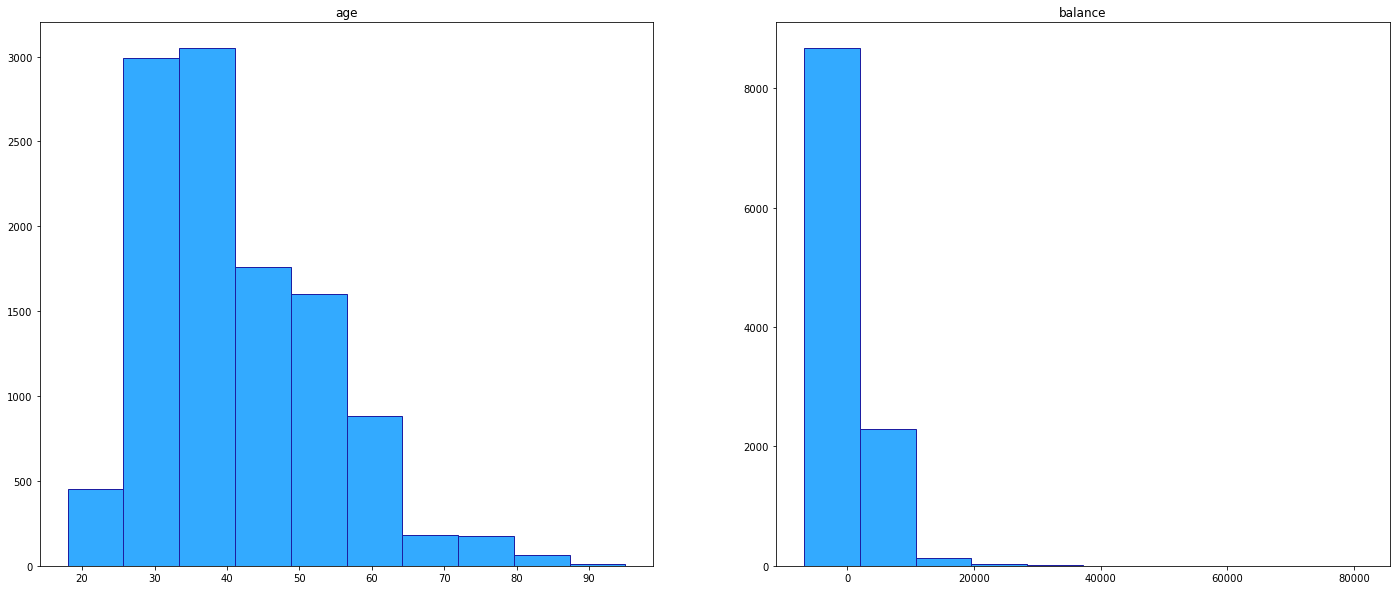

In [8]:
figure, axis = plt.subplots(1, 2, figsize=(10,10))

axis[0].hist(numeric_cols["age"], color = "#33AAFF", edgecolor="#1D1EA2")
axis[0].set_title("age")

axis[1].hist(numeric_cols["balance"], color = "#33AAFF", edgecolor="#1D1EA2")
axis[1].set_title("balance")

plt.subplots_adjust(right=2)
plt.show()

- Độ tuổi trung bình của tập khách hàng rơi vào khoảng 40 tuổi, vẫn có rất nhiều trường hợp có số tuổi lớn hơn 70 tuổi, thậm chí cao nhất là 95 tuổi. Tập khách hàng chủ yếu rơi vào khoảng từ 25 đến 40 tuổi.
- Có thể thấy thì chiến dịch marketing của ngân hàng này nhắm phần lớn vào tập khách hàng có số tiền trong tài khoản ở mức trung bình khá (từ 0 cho đến 20000). Có một lượng khách hàng có số tiền trong tài khoản ở mức âm và bên cạnh đó có khoảng 6 khách hàng có rất nhiều tiền trong tài khoản (từ 40000 cho đến 60000).
- Riêng đối cột `balance` thì số lượng outlier (theo quy ước chuẩn The position of the whiskers = 1.5) rất nhiều.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

- Tập dữ liệu có các cột categorical là "job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome" và "deposit"
- Với mỗi cột categorical, bởi vì đã nói ở trên là không có cột nào bị thiếu dữ liệu do đó em sẽ đếm số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu).
- Kết quả em sẽ lưu vào dataframe `cate_col_distribution`.

In [9]:
cate_cols = ["job", "marital", "education", "default", "housing", 
             "loan", "contact", "month", "poutcome", "deposit"]
categorical_cols = bank_df[cate_cols]

miss = categorical_cols.isna().mean() * 100
num_diff = categorical_cols.nunique()
diff = categorical_cols.apply(lambda x: x.dropna().unique())

cate_col_profiles_df = pd.DataFrame([miss, num_diff, diff], 
                                    columns = cate_cols,
                                    index = ["missing ratio", "num_diff_vals", "diff_vals"])
cate_col_profiles_df

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
missing ratio,0.627128,0.0,4.452607,0.0,0.0,0.0,21.017739,0.0,74.592367,0.0
num_diff_vals,11,3,3,2,2,2,2,12,3,2
diff_vals,"[admin., technician, services, management, ret...","[married, single, divorced]","[secondary, tertiary, primary]","[no, yes]","[yes, no]","[no, yes]","[cellular, telephone]","[may, jun, jul, aug, oct, nov, dec, jan, feb, ...","[other, failure, success]","[yes, no]"


### Làm rõ hơn ý nghĩa cột `poutcome`

- Theo như mô tả trên `UCI Machine Learning Repository` thì cột `poutcome` chỉ có 3 giá trị là `failure`, `nonexistent`, `success` tuy nhiên khi kiểm tra lại về `num_diff_vals` của nó thì lại có đến có giá trị `other`.
- Chọn ra các dòng có giá trị `poutcome` là `other` để kiểm tra

In [10]:
bank_df[bank_df["poutcome"] == "other"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
890,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
961,34,management,single,tertiary,no,1494,yes,no,cellular,18,nov,596,1,182,1,other,yes
968,46,management,married,tertiary,no,0,no,no,cellular,18,nov,716,2,110,3,other,yes
977,43,management,married,tertiary,no,1429,yes,no,cellular,19,nov,1015,1,198,2,other,yes
982,33,technician,single,tertiary,no,149,yes,no,cellular,19,nov,424,2,182,1,other,yes


- Có thể thấy rằng những dòng có giá trị `poutcome` là `other` đều là những khách hàng cũ đã từng được liên lạc trong các chiến dịch marketing trước nhưng có kết quả `poutcome` không rõ ràng.
- `other` là 1 khái niệm quá rộng, không thể khai thác được điều gì, do đó thay vì để giá trị là `other` em sẽ chuyển nó về `nonexistent` giống như mô tả của tập dữ liệu.

In [12]:
bank_df["poutcome"].value_counts()

failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [11]:
# bank_df["poutcome"] = bank_df["poutcome"].replace(["unknown", "other"], "nonexistent")
# bank_df["poutcome"].unique()

---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá dữ liệu, nhóm em nhận thấy có một số câu hỏi có thể được trả lời bằng dữ liệu như sau:
- **Câu hỏi**: Ở độ tuổi nào thì khách hàng có xu hướng gửi tiền có kỳ hạn cao nhất?
    - **Ý Nghĩa**: Giúp ngân hàng gom nhóm khác hàng theo độ tuổi có khả năng cao mở tài khoản tiền gửi có kỳ hạn để tập trung cho nhóm này cho chiến dịch kế tiếp.
- **Câu hỏi**: Tỉ lệ những khách hàng có giá trị `poutcome` là `success` và đồng ý mở tài khoản tiền gửi có kỳ hạn
    - **Ý Nghĩa**: Tập khách hàng này là những khách hàng đã ngân hàng liên lạc trong 1 chiến dịch marketing trước đó và họ đồng ý tham gia với chương trình của ngân hàng, nếu tỉ lệ những khách hàng này tiếp tục đồng ý tham gia với chiến dịch tiền gửi có kỳ hạn lần này thì có lẽ rằng vơi những chiến dịch kế tiếp, ngân hàng nên đánh mạnh vào tập khách hàng mà đã đồng ý tham gia các chiến dịch trước đó của họ.
- **Câu hỏi**: Số cuộc liên lạc của khách hàng theo từng tháng là bao nhiêu? Tháng nào có tỉ lệ thành công cao nhất?
    - **Ý Nghĩa**: Thời điểm liên lạc cho khách hàng đóng vai trò khá quan trọng đến việc liệu rằng họ có chấp nhận mở tài khoản tiền gửi có kỳ hạn hay không. Nắm bắt được thời điểm này sẽ giúp ngân hàng tiết kiệm thời gian hơn trong việc liên lạc với khách hàng
- **Câu hỏi**: Liệu chúng ta có thể tận dụng tập dữ liệu để xây dựng mô hình dự đoán cho các chiến dịch lần sau hay không? Vậy chúng ta có thể biết trước được 1 khách hàng có tham gia tiền gửi có kỳ hạn hay không dựa vào tập dữ liệu?